In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/ismael-araujo/Finding-Exoplanet-Using-Machine-Learning/main/exoplanets_2018.csv')

df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2359 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

In [6]:
df = df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
df.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,...,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [7]:
print('Kepler data possible values: ',df.DispositionUsingKeplerData.unique())
print('Exoplanets data possible values: ',df.ExoplanetArchiveDisposition.unique())

Kepler data possible values:  ['CANDIDATE' 'FALSE POSITIVE']
Exoplanets data possible values:  ['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


In [8]:
# to numeric meaning
df['ExoplanetCandidate']=df['DispositionUsingKeplerData'].apply(lambda x: 1 if x=='CANDIDATE' else 0)
df['ExoplanetConfirmed']=df['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x=='CONFIRMED' else 1 if x=='CANDIDATE' else 0)

In [9]:
#remove rows with nan values, and columns that only have nan values
dtypes=['int64','float64']
df=df[[column for column in df.columns if df.dtypes[column] in dtypes]].dropna(how='all',axis=1).dropna()

df.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,...,StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,...,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,...,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,...,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [10]:
df.shape

(7803, 44)

In [11]:
df=df.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7803 entries, 0 to 9563
Data columns (total 44 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   KepID                                                  7803 non-null   float64
 1   DispositionScore                                       7803 non-null   float64
 2   NotTransit-LikeFalsePositiveFlag                       7803 non-null   float64
 3   koi_fpflag_ss                                          7803 non-null   float64
 4   CentroidOffsetFalsePositiveFlag                        7803 non-null   float64
 5   EphemerisMatchIndicatesContaminationFalsePositiveFlag  7803 non-null   float64
 6   OrbitalPeriod[days                                     7803 non-null   float64
 7   OrbitalPeriodUpperUnc.[days                            7803 non-null   float64
 8   OrbitalPeriodLowerUnc.[days                     

In [1]:
from importlib import reload
import toolsReals
reload(toolsReals)

<module 'toolsReals' from '/home/andresriveros/ds/exoplanets/toolsReals.py'>

In [2]:
from toolsReals import *
from sklearn.model_selection import train_test_split

### Exoplanet candidate model

In [12]:
X = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
y = df.ExoplanetCandidate

In [13]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=test_size)

In [14]:
import time

#Support vector machine model fitted on data
tic=time.time()
mod=BestClModel()
y_pred=mod.best_svm(X_train,y_train,X_test)
tac=time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 2/5; 2/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 2/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 2/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 1/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 2/5; 2/80] END C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.935 total time=   0.8s
[CV 5/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 2/80] END C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.937 total time=   0.8s
[CV 4/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 2/5; 1/80] END C=1, class_weight=None, decision_function_shape=ovr, gamm

[CV 2/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.935 total time=   0.7s
[CV 1/5; 9/80] START C=1, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.938 total time=   0.8s
[CV 5/5; 8/80] START C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 5/5; 7/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.967 total time=   1.0s
[CV 4/5; 8/80] START C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 3/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.942 total time=   0.8s
[CV 2/5; 9/80] START C=1, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 5/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo

[CV 5/5; 14/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.928 total time=   0.9s
[CV 3/5; 15/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 1/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.975 total time=   1.1s
[CV 5/5; 15/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 2/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.965 total time=   1.1s
[CV 1/5; 16/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 4/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.983 total time=   1.1s
[CV 2/5; 16/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 3/5; 15/80] END C=1, class_weight=balanced,

[CV 1/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 3/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.940 total time=   0.7s
[CV 2/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 4/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.952 total time=   0.8s
[CV 4/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 5/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.927 total time=   0.8s
[CV 3/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 1/5; 23/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.975 total time=   1.0s
[CV 5/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, ga

[CV 1/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 2/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.968 total time=   1.6s
[CV 3/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 5/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.971 total time=   1.3s
[CV 4/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 2/5; 30/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.926 total time=   0.8s
[CV 5/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 1/5; 30/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.932 total time=   0.8s
[CV 1/5; 31/80] START C=2, c

[CV 4/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.949 total time=   0.8s
[CV 2/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 5/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.926 total time=   0.8s
[CV 1/5; 38/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 3/5; 37/80] END C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.974 total time=   0.9s
[CV 5/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 1/5; 37/80] END C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.975 total time=   1.0s
[CV 4/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 2/5; 37/80] END C=4, class_weight=None, decision_function_shape=ovo, g

[CV 4/5; 43/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.985 total time=   1.0s
[CV 3/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 1/5; 44/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.929 total time=   0.7s
[CV 4/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 5/5; 43/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.972 total time=   1.0s
[CV 5/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 2/5; 44/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.924 total time=   0.8s
[CV 1/5; 45/80] START C=4, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 4/5; 44/80] END C=4, class_weight=b

[CV 4/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 5/5; 50/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.924 total time=   0.8s
[CV 3/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 1/5; 51/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.973 total time=   1.0s
[CV 5/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 2/5; 51/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.971 total time=   1.0s
[CV 1/5; 52/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 4/5; 51/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.985 total time=   0.9s
[CV 2/5; 52/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=au

[CV 2/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.922 total time=   0.8s
[CV 1/5; 59/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 4/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.944 total time=   0.7s
[CV 3/5; 59/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 3/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.939 total time=   0.8s
[CV 2/5; 59/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 5/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.924 total time=   0.8s
[CV 4/5; 59/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 1/5; 59/80] END C=5, class_weight=ba

[CV 1/5; 66/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 3/5; 65/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.973 total time=   1.0s
[CV 2/5; 66/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 5/5; 65/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.972 total time=   0.8s
[CV 3/5; 66/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 1/5; 66/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.925 total time=   0.7s
[CV 4/5; 66/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 4/5; 65/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.985 total time=   1.0s
[CV 5/5; 66/80] START C=7, class_weight=None, decision_function_

[CV 3/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.936 total time=   0.7s
[CV 3/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 4/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.946 total time=   0.8s
[CV 2/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 73/80] END C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.975 total time=   0.8s
[CV 4/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 5/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.924 total time=   0.8s
[CV 5/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 3/5; 73/80] END C=7, class_weight=balanced, decisio

[CV 5/5; 79/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.971 total time=   0.9s
[CV 3/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 4/5; 79/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.984 total time=   1.0s
[CV 4/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 2/5; 80/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.920 total time=   0.7s
[CV 5/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 1/5; 80/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.922 total time=   0.7s
[CV 3/5; 80/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.940 total time=   0.7s
[CV 5

In [15]:
print('Prediction: ',y_pred)
print("Execution time: %.3f [min]" %((tac-tic)/60))

Prediction:  [0. 0. 0. ... 1. 0. 1.]
Execution time: 1.601 [min]


In [16]:
mod.metrics_res(y_test,y_pred)

Metrics results:
Accuracy: 0.9756514310123878
Recall: 0.9694214876033058
F1 Score: 0.9762796504369539


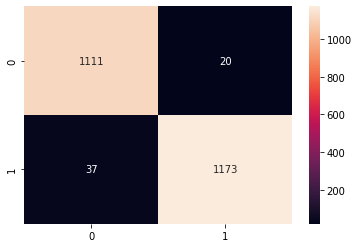

In [17]:
mod.conf_matrix(y_test.values,y_pred, 2) #Confusion matrix

In [23]:
#Comparison dataframe
result=pd.DataFrame({'True values':y_test.apply(lambda x: 'CANDIDATE' if x==1.0 else 'NO EXOPLANET').values,
             'Predicted values':pd.Series(y_pred).apply(lambda x: 'CANDIDATE' if x==1.0 else 'NO EXOPLANET').values})
result

,True values,Predicted values
0,NO EXOPLANET,NO EXOPLANET
1,NO EXOPLANET,NO EXOPLANET
2,NO EXOPLANET,NO EXOPLANET
3,CANDIDATE,CANDIDATE
4,NO EXOPLANET,NO EXOPLANET
...,...,...
2336,CANDIDATE,CANDIDATE
2337,CANDIDATE,CANDIDATE
2338,CANDIDATE,CANDIDATE
2339,NO EXOPLANET,NO EXOPLANET


### Exoplanet confirmed model

In [18]:
X2 = df.drop(columns=['ExoplanetCandidate','ExoplanetConfirmed'])
y2 = df.ExoplanetConfirmed

test_size2=.3
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1, test_size=test_size2)

In [19]:
y_test2

441     0.0
8525    0.0
1632    0.0
2911    1.0
7087    0.0
       ... 
1802    2.0
243     2.0
2130    1.0
3888    0.0
3902    2.0
Name: ExoplanetConfirmed, Length: 2341, dtype: float64

In [20]:
import time

#Support vector machine model fitted on data
tic2=time.time()
mod2=BestClModel()
y_pred2=mod2.best_svm(X_train2,y_train2,X_test2)
tac2=time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 2/5; 2/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 2/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 2/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 1/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 2/5; 2/80] END C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.801 total time=   2.9s
[CV 5/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 2/80] END C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.814 total time=   3.0s
[CV 4/5; 1/80] START C=1, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 2/5; 1/80] END C=1, class_weight=None, decision_function_shape=ovr, gamm

[CV 5/5; 7/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.855 total time=   2.9s
[CV 4/5; 8/80] START C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 1/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.816 total time=   2.9s
[CV 5/5; 8/80] START C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 2/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.801 total time=   2.7s
[CV 1/5; 9/80] START C=1, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 3/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.801 total time=   2.8s
[CV 2/5; 9/80] START C=1, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 4/5; 8/80] END C=1, class_weight=None, decision_function_shape=ovo

[CV 5/5; 14/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.815 total time=   3.2s
[CV 4/5; 15/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 1/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.858 total time=   3.2s
[CV 5/5; 15/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 2/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.856 total time=   3.1s
[CV 1/5; 16/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 3/5; 15/80] END C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.852 total time=   3.2s
[CV 2/5; 16/80] START C=1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 4/5; 15/80] END C=1, class_weight=balanced,

[CV 1/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.823 total time=   2.7s
[CV 5/5; 22/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 2/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.789 total time=   2.6s
[CV 1/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 3/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.810 total time=   2.6s
[CV 2/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 4/5; 22/80] END C=2, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=sigmoid;, score=0.816 total time=   1.8s
[CV 3/5; 23/80] START C=2, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=rbf
[CV 5/5; 22/80] END C=2, class_weight=None, decision_function_shape

[CV 1/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.866 total time=   2.8s
[CV 5/5; 29/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 3/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.853 total time=   2.6s
[CV 1/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 2/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.862 total time=   3.0s
[CV 2/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 4/5; 29/80] END C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.862 total time=   2.8s
[CV 4/5; 30/80] START C=2, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=sigmoid
[CV 5/5; 29/80] END C=2, class_weight=ba

[CV 2/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.772 total time=   2.1s
[CV 1/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 3/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.797 total time=   2.2s
[CV 2/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 4/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.809 total time=   1.5s
[CV 4/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 5/5; 36/80] END C=4, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.813 total time=   1.6s
[CV 3/5; 37/80] START C=4, class_weight=None, decision_function_shape=ovo, gamma=scale, kernel=rbf
[CV 1/5; 37/80] END C=4, class_weight=None, decision_function_shape=ovo,

[CV 1/5; 43/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.872 total time=   3.7s
[CV 1/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 3/5; 43/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.850 total time=   3.1s
[CV 2/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 1/5; 44/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid;, score=0.787 total time=   1.5s
[CV 3/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 4/5; 43/80] END C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.864 total time=   2.5s
[CV 4/5; 44/80] START C=4, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=sigmoid
[CV 5/5; 43/80] END C=4, class_weight=ba

[CV 2/5; 50/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.771 total time=   2.7s
[CV 5/5; 50/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 4/5; 50/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.812 total time=   1.8s
[CV 2/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 3/5; 50/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.790 total time=   3.1s
[CV 3/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 1/5; 51/80] END C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf;, score=0.870 total time=   3.2s
[CV 4/5; 51/80] START C=5, class_weight=None, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 5/5; 50/80] END C=5, class_weight=None, decision_function_shape=ovr,

[CV 4/5; 57/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.867 total time=   2.8s
[CV 3/5; 58/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 5/5; 57/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.860 total time=   2.6s
[CV 4/5; 58/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 1/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.787 total time=   1.5s
[CV 5/5; 58/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 2/5; 58/80] END C=5, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=sigmoid;, score=0.800 total time=   1.5s
[CV 1/5; 59/80] START C=5, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf
[CV 3/5; 58/80] END C=5, class_we

[CV 3/5; 64/80] END C=5, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.776 total time=   2.3s
[CV 3/5; 65/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 5/5; 64/80] END C=5, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.778 total time=   2.3s
[CV 4/5; 65/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 65/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.870 total time=   2.5s
[CV 5/5; 65/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 2/5; 65/80] END C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=rbf;, score=0.867 total time=   2.5s
[CV 1/5; 66/80] START C=7, class_weight=None, decision_function_shape=ovr, gamma=scale, kernel=sigmoid
[CV 3/5; 65/80] END C=7, class_weight=None, decision_function_shap

[CV 2/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.775 total time=   2.3s
[CV 1/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 4/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.814 total time=   1.5s
[CV 3/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 5/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.813 total time=   1.6s
[CV 2/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 3/5; 72/80] END C=7, class_weight=None, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.787 total time=   2.1s
[CV 4/5; 73/80] START C=7, class_weight=balanced, decision_function_shape=ovr, gamma=scale, kernel=rbf
[CV 1/5; 73/80] END C=7, class_weight=balanced, decision

[CV 2/5; 79/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.874 total time=   2.8s
[CV 1/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 3/5; 79/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.855 total time=   2.8s
[CV 2/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 4/5; 79/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf;, score=0.868 total time=   3.1s
[CV 3/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 1/5; 80/80] END C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid;, score=0.786 total time=   1.8s
[CV 4/5; 80/80] START C=7, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=sigmoid
[CV 5/5; 79/80] END C=7, class_weight=ba

In [21]:
print('Prediction: ',y_pred2)
print("Execution time: %.3f [min]" %((tac2-tic2)/60))

Prediction:  [0. 0. 0. ... 2. 0. 1.]
Execution time: 4.709 [min]


In [22]:
print('Metrics results:')
print('Accuracy: ' + str(accuracy_score(y_test2, y_pred2)))
print('Recall: ' + str(recall_score(y_test2, y_pred2, average='micro')))
print('F1 Score: ' + str(f1_score(y_test2, y_pred2,average='weighted')))

Metrics results:
Accuracy: 0.8761213156770611
Recall: 0.8761213156770611
F1 Score: 0.8719646436801933


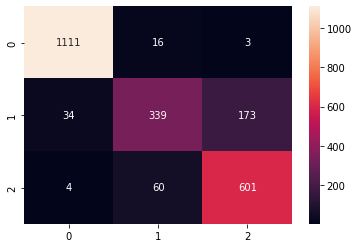

In [23]:
mod.conf_matrix(y_test2.values,y_pred2,3) #Confusion matrix

In [24]:
result2=pd.DataFrame({'True values':y_test2.apply(lambda x: 'CONFIRMED' if x==2 else 'CANDIDATE' if x==1 else 'NO EXOPLANET').values,
             'Predicted values':pd.Series(y_pred2).apply(lambda x: 'CONFIRMED' if x==2 else 'CANDIDATE' if x==1 else 'NO EXOPLANET').values})
result2

,True values,Predicted values
0,NO EXOPLANET,NO EXOPLANET
1,NO EXOPLANET,NO EXOPLANET
2,NO EXOPLANET,NO EXOPLANET
3,CANDIDATE,CANDIDATE
4,NO EXOPLANET,NO EXOPLANET
...,...,...
2336,CONFIRMED,CONFIRMED
2337,CONFIRMED,CONFIRMED
2338,CANDIDATE,CONFIRMED
2339,NO EXOPLANET,NO EXOPLANET
